In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [89]:
df = pd.read_csv('../../dataset/winequality_red.csv')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [91]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [92]:
# finding the duplicate values
df.duplicated().sum()

240

In [93]:
# now removing the duplicate values
df = df.drop_duplicates()
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


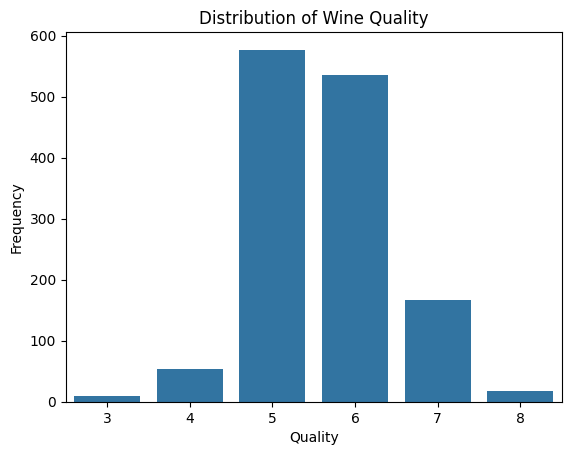

In [94]:
# data visualization and analysis the wine quality dataset
sns.countplot(x='quality', data=df)
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')

plt.show()

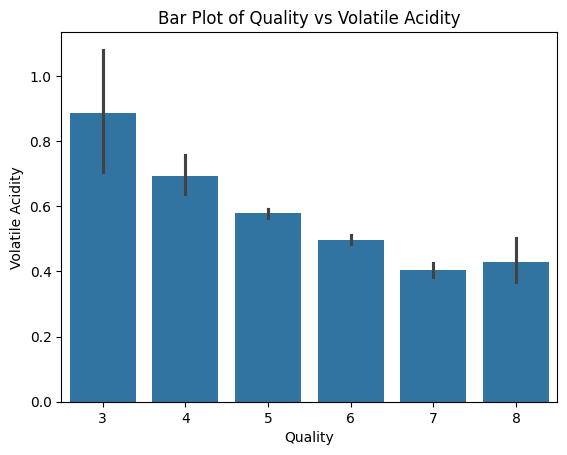

In [95]:
# relation betwee qaulity and acidity
sns.barplot(x='quality', y='volatile acidity', data=df)
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.title('Bar Plot of Quality vs Volatile Acidity')
plt.show()

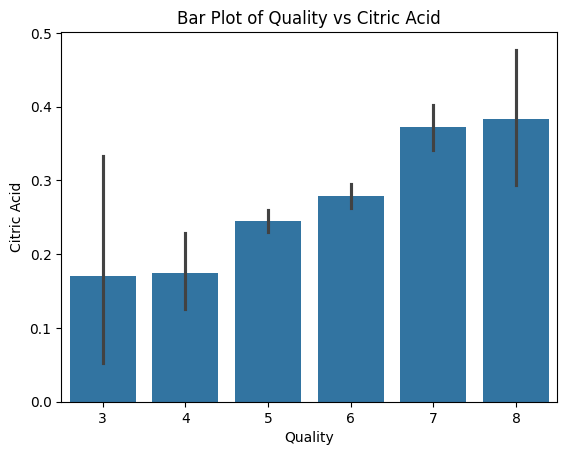

In [96]:
# citric acid vs quality
sns.barplot(x='quality', y='citric acid', data=df)
plt.xlabel('Quality')
plt.ylabel('Citric Acid')
plt.title('Bar Plot of Quality vs Citric Acid')
plt.show()

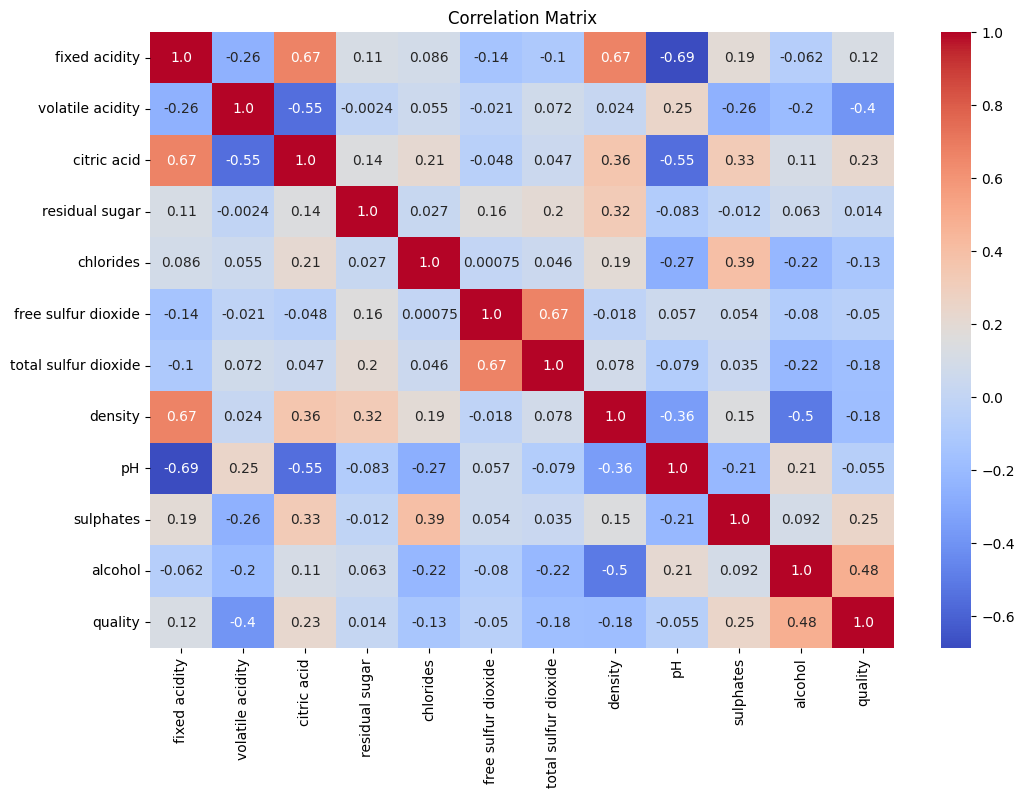

In [97]:
# now checking the correlation between the features and the target varialbl
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2')
plt.title('Correlation Matrix')
plt.show()

In [98]:
# Label Binarization¶
y = (df['quality'] >6).astype(int)
x= df.drop('quality', axis=1)
y

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1359, dtype: int32

In [99]:
print(x.shape)
print(y.shape)

(1359, 11)
(1359,)


In [100]:
from sklearn.model_selection import train_test_split

x_train, x_text, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [101]:
# build the baseline
acc_baseline = y.value_counts(normalize=True).max()
print(f'Baseline Accuracy: {acc_baseline:.2f}')

Baseline Accuracy: 0.86


In [102]:
from sklearn.neighbors import KNeighborsClassifier

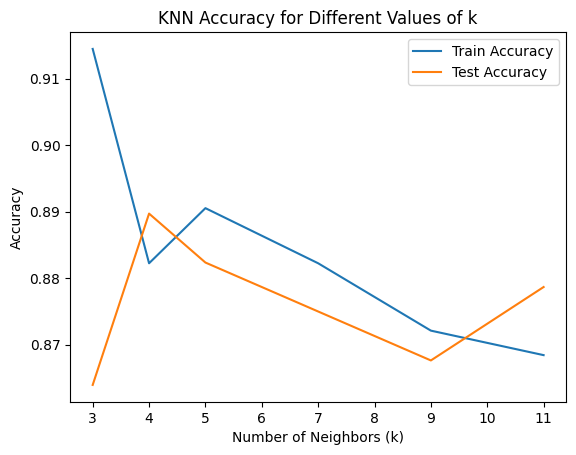

[0.9144434222631095, 0.8822447102115916, 0.890524379024839, 0.8822447102115916, 0.8721251149954001, 0.8684452621895125]
[0.8639705882352942, 0.8897058823529411, 0.8823529411764706, 0.875, 0.8676470588235294, 0.8786764705882353]


In [103]:
k_neighbours =[3, 4,5, 7, 9, 11]
train_acc =[]
test_acc =[]

for i in k_neighbours:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_text, y_test))
    
plt.plot(k_neighbours, train_acc, label='Train Accuracy')
plt.plot(k_neighbours, test_acc, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Values of k')
plt.legend()
plt.show()

print(train_acc)
print(test_acc)

from the visualization we can see that the best value of k is 4 and 5 because they have the highest test accuracy. Now we will build the model with k=4 and k=5 and evaluate the performance of the model.

In [104]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_text)
from sklearn.metrics import classification_report, confusion_matrix
print(knn.score(x_text, y_test))
print(confusion_matrix(y_test, y_pred))


0.8897058823529411
[[236   2]
 [ 28   6]]


#using the RandomForest Classifire


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [110]:
rfc = RandomForestClassifier(random_state=42)


In [108]:
# initializing the params
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
params

{'n_estimators': [100, 200, 300],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [115]:
rfc_model = GridSearchCV(
    rfc,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1    
)
rfc_model

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [116]:
rfc_model.fit(x_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [120]:
result = pd.DataFrame(rfc_model.cv_results_)
result.sort_values(by='mean_test_score')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.682098,0.049604,0.025063,0.007112,True,None,1,5,100,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.871560,0.853211,0.880184,0.843318,0.861751,0.862005,0.013026,214
57,0.601335,0.063432,0.019906,0.002165,True,20,1,5,100,"{'bootstrap': True, 'max_depth': 20, 'min_samp...",0.871560,0.853211,0.880184,0.843318,0.861751,0.862005,0.013026,214
84,0.576578,0.023470,0.020143,0.001200,True,30,1,5,100,"{'bootstrap': True, 'max_depth': 30, 'min_samp...",0.871560,0.853211,0.880184,0.843318,0.861751,0.862005,0.013026,214
41,1.712339,0.099115,0.053041,0.004196,True,10,2,5,300,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.889908,0.853211,0.875576,0.838710,0.866359,0.864753,0.017686,213
61,1.085198,0.049561,0.036021,0.006356,True,20,1,10,200,"{'bootstrap': True, 'max_depth': 20, 'min_samp...",0.889908,0.848624,0.875576,0.843318,0.866359,0.864757,0.017159,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.707022,0.146794,0.053223,0.006414,False,30,2,2,300,"{'bootstrap': False, 'max_depth': 30, 'min_sam...",0.885321,0.862385,0.898618,0.852535,0.884793,0.876730,0.016787,5
117,0.564771,0.032465,0.022634,0.002636,False,None,2,2,100,"{'bootstrap': False, 'max_depth': None, 'min_s...",0.885321,0.871560,0.894009,0.852535,0.884793,0.877643,0.014459,2
198,0.557764,0.040277,0.020920,0.000852,False,30,2,2,100,"{'bootstrap': False, 'max_depth': 30, 'min_sam...",0.885321,0.871560,0.894009,0.852535,0.884793,0.877643,0.014459,2
171,0.558556,0.047528,0.018426,0.001579,False,20,2,2,100,"{'bootstrap': False, 'max_depth': 20, 'min_sam...",0.885321,0.871560,0.894009,0.852535,0.884793,0.877643,0.014459,2


In [121]:
rfc_model.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [123]:
rfc_model.predict(x_text)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

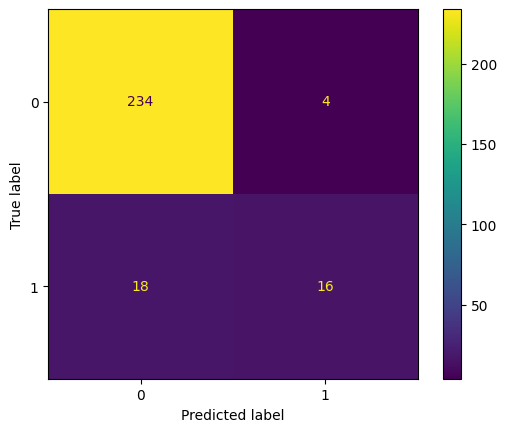

In [124]:
# visual for confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_estimator(rfc_model, x_text, y_test)

In [126]:
# confusion matrix and score
report = classification_report(y_test, rfc_model.predict(x_text))
print("report using the grid search and the random forest:", report)

report using the grid search and the random forest:               precision    recall  f1-score   support

           0       0.93      0.98      0.96       238
           1       0.80      0.47      0.59        34

    accuracy                           0.92       272
   macro avg       0.86      0.73      0.77       272
weighted avg       0.91      0.92      0.91       272



# now using another model named Gradient boosting and see whether it perform best or not

In [127]:
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
params ={
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7]
    
}
params


{'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}

In [130]:
gbc = GradientBoostingClassifier(random_state=42)


In [132]:
gbc_model = GridSearchCV(
    gbc,
    param_grid = params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
gbc_model

,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [133]:
gbc_model.fit(x_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [135]:
cv_results = pd.DataFrame(gbc_model.cv_results_)
cv_results.sort_values(by='mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.633045,0.019950,0.006972,0.000982,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.885321,0.839450,0.880184,0.847926,0.857143,0.862005,0.017915,9
3,1.292278,0.088880,0.007555,0.002687,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.885321,0.862385,0.880184,0.843318,0.847926,0.863827,0.016764,8
2,2.260599,0.143745,0.008966,0.001785,3,300,"{'max_depth': 3, 'n_estimators': 300}",0.876147,0.862385,0.889401,0.857143,0.847926,0.866600,0.014608,7
1,1.346791,0.169830,0.007629,0.001888,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.871560,0.862385,0.884793,0.857143,0.857143,0.866605,0.010509,6
7,4.755342,0.439914,0.008365,0.001896,7,200,"{'max_depth': 7, 'n_estimators': 200}",0.880734,0.830275,0.898618,0.866359,0.870968,0.869391,0.022470,5
8,6.083927,0.338740,0.009697,0.001225,7,300,"{'max_depth': 7, 'n_estimators': 300}",0.885321,0.834862,0.903226,0.866359,0.866359,0.871226,0.022770,4
5,4.348890,0.940328,0.016261,0.013738,5,300,"{'max_depth': 5, 'n_estimators': 300}",0.889908,0.853211,0.894009,0.847926,0.880184,0.873048,0.018969,3
4,2.624172,0.399304,0.015963,0.014166,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.880734,0.857798,0.889401,0.857143,0.880184,0.873052,0.013137,2
6,2.701554,0.664017,0.009308,0.000957,7,100,"{'max_depth': 7, 'n_estimators': 100}",0.885321,0.844037,0.903226,0.852535,0.894009,0.875825,0.023343,1


In [136]:
gbc_model.best_params_


{'max_depth': 7, 'n_estimators': 100}

In [137]:
gbc_model.predict(x_text)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0])

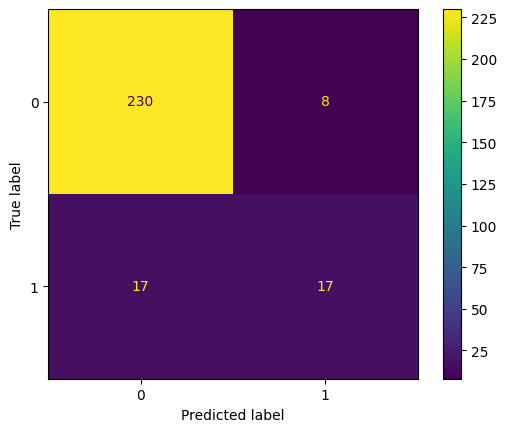

In [139]:
# now displaying the confusion matrix for the gradient boosting classifier
ConfusionMatrixDisplay.from_estimator(gbc_model, x_text, y_test)


In [140]:
# score and confusion matrix for the gradient boosting classifier
report = classification_report(y_test, gbc_model.predict(x_text))
print("report using the grid search and the gradient boosting classifier:", report)

report using the grid search and the gradient boosting classifier:               precision    recall  f1-score   support

           0       0.93      0.97      0.95       238
           1       0.68      0.50      0.58        34

    accuracy                           0.91       272
   macro avg       0.81      0.73      0.76       272
weighted avg       0.90      0.91      0.90       272



In [144]:
# now the final comparison between all the models

models ={
   "model": ["KNN", "Random Forest", "Gradient Boosting"],
   "score": [knn.score(x_text, y_test), rfc_model.score(x_text, y_test), gbc_model.score(x_text, y_test)]
}

models


{'model': ['KNN', 'Random Forest', 'Gradient Boosting'],
 'score': [0.8897058823529411, 0.9191176470588235, 0.9080882352941176]}

C:\Users\yadav\AppData\Local\Temp\ipykernel_8852\2892773251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models['model'],y=models['score'], palette=colors )


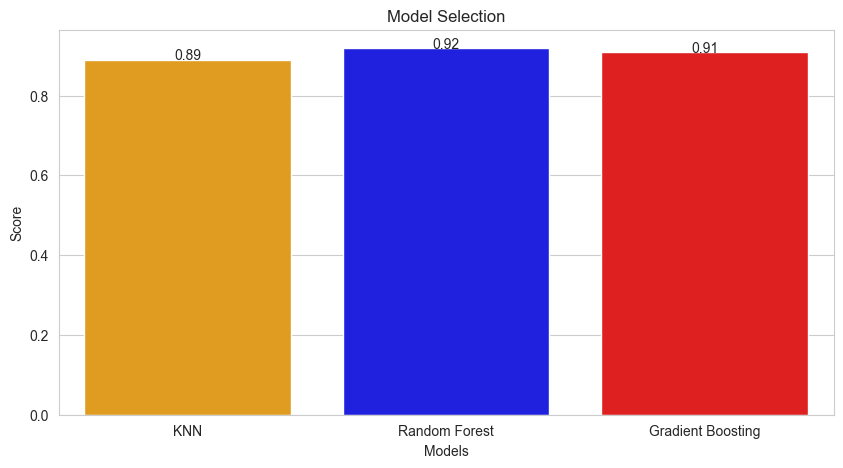

In [146]:
# Data Visualization
colors= ['orange' , 'blue','red']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=models['model'],y=models['score'], palette=colors )
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")

# Add value labels to each bar
for p in ax.patches:
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=p.get_height(),
            s='{:.2f}'.format(p.get_height()),
            ha='center')
    
plt.show()
